# Importing Libraries

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Displaying the test image

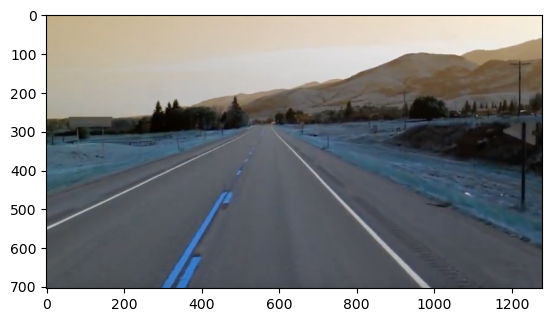

In [33]:
#loading the image
image = cv2.imread(r'C:\Users\Aditya Sharma\OneDrive\Desktop\Desktop Folder\dip_data\test_image.jpg')
plt.imshow(image)
plt.show()

# Pre processing the frames

In the following cells, we will begin preprocessing the test image to facilitate information extraction and enhance the robustness of lane detection.

# Gray Scale Conversion

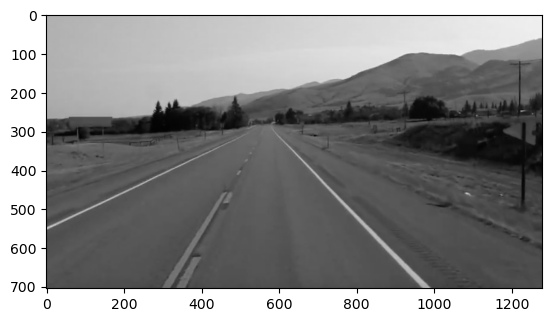

In [34]:
lane_image = np.copy(image) #creating a copy of the image
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY) #converting RGB to GRAY
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

# Gaussian Blur

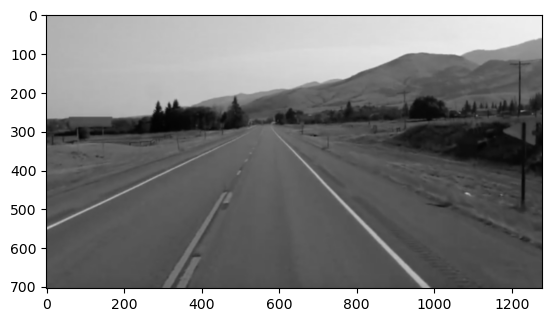

In [35]:
blur = cv2.GaussianBlur(gray, (5,5),0) # Kernel Dimension = 5x5 ; Mean = 0
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

# Canny Edge Detection

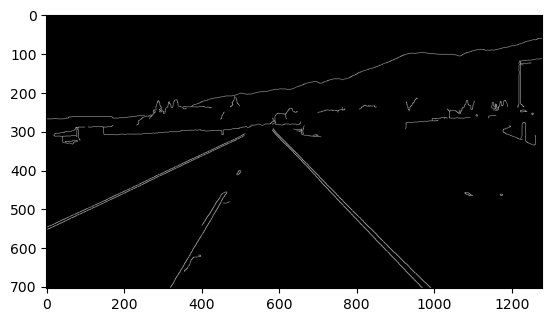

In [36]:
canny = cv2.Canny(blur,50,150) # canny edge detection low threshold = 50, high threshold = 150
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
plt.show()

# Mask Creation

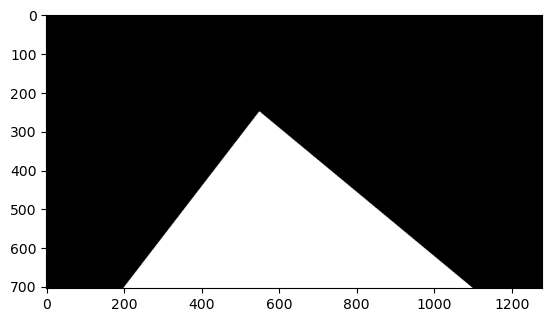

In [37]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200,height), (1100,height), (550,250)]]) #polygon dimensions
    mask = np.zeros_like(image) #creating a complete black image with similar dimensions
    cv2.fillPoly(mask,polygons, 255) #complety white mask boundary
    return mask

masked = region_of_interest(canny)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.show()

# Applying the mask to processed image

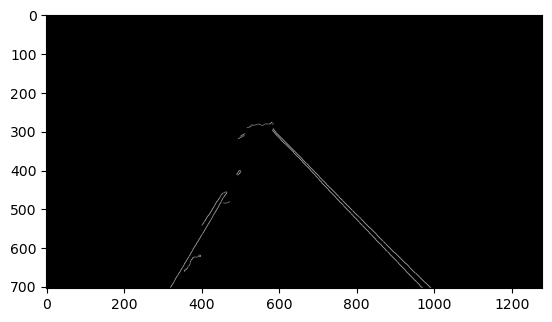

In [38]:
#only the required area using mask
cropped_mask = cv2.bitwise_and(canny, masked) 
plt.imshow(cv2.cvtColor(cropped_mask, cv2.COLOR_BGR2RGB))
plt.show()

# Hough Transform for lane detection

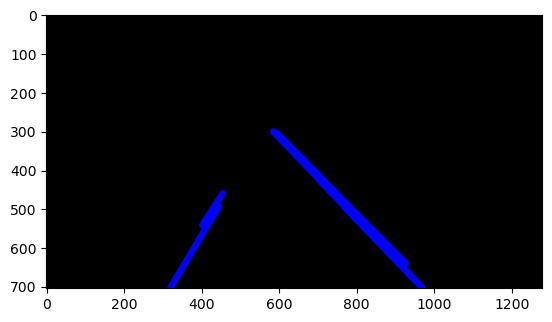

In [39]:
# hough transform detecting the lanes/lines
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def display_lines(image,lines): #lines parameter is 2d array
    line_image = np.zeros_like(image)
    if lines is not None: #to check if lines is not empty
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),15) #thickness =15 blue line BGR 
    return line_image

def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200,height), (1100,height), (550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons, 255) #complety white mask boundary
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

canny_image = canny(image)
cropped_image = region_of_interest(canny_image)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100,np.array([]),minLineLength = 40, maxLineGap=5)
line_image = display_lines(image,lines)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.show()

# Final Image After Pre-Processing & Hough Transform

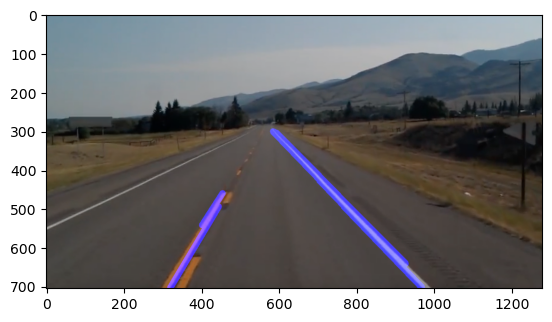

In [40]:
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
plt.imshow(cv2.cvtColor(combo_image, cv2.COLOR_BGR2RGB))
plt.show()

# MAIN CODE

In [41]:
def make_coordinates(image, line_parameters):
    slope,intercept = line_parameters
    y1= image.shape[0]
    y2=int(y1*(3/5))
    x1=int((y1-intercept)/slope)
    x2=int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])

def average_slope_intercept(image,lines):
    left_fit=[] #co ordinates of line on the left lane (-ve slope)
    right_fit =[]
    for line in lines:
        x1,y1,x2,y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2),(y1,y2),1)#fits the line polynomial into the points x1 y1 x2 y2
        slope = parameters[0]
        intercept = parameters[1]
        if slope<0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
            
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line,right_line])

In [42]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny


def display_lines(image,lines): #lines parameter is 2d array
    line_image = np.zeros_like(image)
    if lines is not None: #to check if lines is not empty
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),15) #thickness =15 blue line BGR 
    return line_image
    
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200,height), (1100,height), (550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons, 255) #complety white mask boundary
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image




In [43]:
image = cv2.imread(r'C:\Users\Aditya Sharma\OneDrive\Desktop\Desktop Folder\dip_data\test_image.jpg')
lane_image = np.copy(image)
canny_image = canny(lane_image)
cropped_image = region_of_interest(canny_image)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100,np.array([]),minLineLength = 40, maxLineGap=5)
averaged_lines = average_slope_intercept(lane_image,lines)
line_image = display_lines(lane_image,averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
cv2.imshow("result",combo_image)
cv2.waitKey(0)


cap = cv2.VideoCapture(r'C:\Users\Aditya Sharma\OneDrive\Desktop\Desktop Folder\dip_data\test2.mp4')
while(cap.isOpened()):
    _, frame= cap.read()
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100,np.array([]),minLineLength = 40, maxLineGap=5)
    #averaged_lines = average_slope_intercept(frame,lines)
    line_image = display_lines(frame,lines) #can replace lines with averaged_lines
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    cv2.imshow("result",combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()

cv2.destroyAllWindows()